## HW2: Linear Discriminant Analysis
In hw2, you need to implement [Fisher’s linear discriminant](https://towardsdatascience.com/fishers-linear-discriminant-intuitively-explained-52a1ba79e1bb) by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get **zero point** by simply calling `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` 

## Load data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [3]:
x_train = pd.read_csv("x_train.csv").values
y_train = pd.read_csv("y_train.csv").values[:,0]
x_test = pd.read_csv("x_test.csv").values
y_test = pd.read_csv("y_test.csv").values[:,0]

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 2)
(750,)
(250, 2)
(250,)


## 1. Compute the mean vectors mi, (i=1,2) of each 2 classes

In [5]:
## Your code HERE
# classify training data into two classes
class1 = np.empty((0,2))
class2 = np.empty((0,2))
# give initial zeroes
for i in range(y_train.size):
  # class1
  if y_train[i]==0:
    class1 = np.append(class1, np.array([x_train[i]]), axis=0)
  # class2
  else:
    class2 = np.append(class2, np.array([x_train[i]]), axis=0)

m1 = class1.mean(axis=0).reshape(-1,1)
m2 = class2.mean(axis=0).reshape(-1,1)

In [6]:
print(f"mean vector of class 1: {m1}", f"mean vector of class 2: {m2}")

mean vector of class 1: [[2.47107265]
 [1.97913899]] mean vector of class 2: [[1.82380675]
 [3.03051876]]


## 2. Compute the Within-class scatter matrix SW

In [7]:
## Your code HERE

# give initial zeroes
sw = np.zeros((2,2))
# class1
for x in class1:
  sw += np.dot(x.reshape(-1,1)-m1, (x.reshape(-1,1)-m1).T)
  # class2
for x in class2: 
  sw += np.dot(x.reshape(-1,1)-m2, (x.reshape(-1,1)-m2).T)

In [8]:
assert sw.shape == (2, 2)
print(f"Within-class scatter matrix SW: {sw}")

Within-class scatter matrix SW: [[140.40036447  -5.30881553]
 [ -5.30881553 138.14297637]]


## 3.  Compute the Between-class scatter matrix SB

In [9]:
## Your code HERE


# total sb
sb = np.dot(m1-m2, (m1-m2).T)

In [10]:
assert sb.shape == (2,2)
print(f"Between-class scatter matrix SB: {sb}")

Between-class scatter matrix SB: [[ 0.41895314 -0.68052227]
 [-0.68052227  1.10539942]]


## 4. Compute the Fisher’s linear discriminant

In [11]:
# w is porportional to Sw-1 * (m2-m1)
w = np.dot(np.linalg.inv(sw), (m2-m1))

# w is restricted to 1 unit
w /= np.sqrt(w[0]**2 + w[1]**2)

In [12]:
assert w.shape == (2,1)
print(f" Fisher’s linear discriminant: {w}")

 Fisher’s linear discriminant: [[-0.50266214]
 [ 0.86448295]]


## 5. Project the test data by linear discriminant and get the class prediction by nearest-neighbor rule.  Calculate the accuracy score 
you can use `accuracy_score` function from `sklearn.metric.accuracy_score`

In [13]:
y_pred = np.zeros(y_test.size)
# compute train value
trained_class1_mean = np.mean(np.dot(w.T, class1.T))
trained_class2_mean = np.mean(np.dot(w.T, class2.T))
# compute tested value
for i, x in enumerate(x_test):
  tmp = np.dot(w.T, x.T)
# use mean value to estimate to reduce
# the influence of outliers
  if np.abs(trained_class1_mean-tmp)<np.abs(trained_class2_mean-tmp):
    y_pred[i] = 0
  else:
    y_pred[i] = 1
acc = accuracy_score(y_test, y_pred)

In [14]:
print(f"Accuracy of test-set {acc}")

Accuracy of test-set 0.908


## 6. Plot the 1) best projection line on the training data and show the slope and intercept on the title (you can choose any value of intercept for better visualization) 2) colorize the data with each class 3) project all data points on your projection line. Your result should look like [this image](https://i.imgur.com/tubMQpw.jpg)

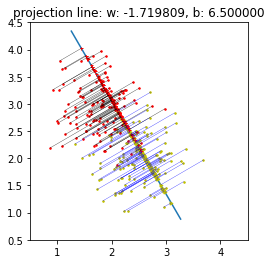

In [130]:
weight = w[1][0]/w[0][0]
intercept = 6.5
plt.title("projection line: w: %f, b: %f" %(weight, intercept))
plt.axis('square')
plt.xlim(0.5,4.5)
plt.ylim(0.5,4.5)
# plot the projection line
plt.plot(np.array([-6.5*w[0][0], -2.5*w[0][0]]),
     np.array([intercept-6.5*w[1][0], intercept-2.5*w[1][0]]))

# classify test data into two classes
pred_class1 = np.empty((0,2))
pred_class2 = np.empty((0,2))
# give initial zeroes
for i in range(y_test.size):
  # class1
  if y_test[i]==0:
    pred_class1 = np.append(pred_class1,
                  np.array([x_test[i]]), axis=0)
  # class2
  else:
    pred_class2 = np.append(pred_class2,
                  np.array([x_test[i]]), axis=0)

# plot the value of each class
plt.plot(pred_class1[:,0], pred_class1[:,1], 'y.',
     pred_class2[:,0], pred_class2[:,1], 'r.', markersize=3)

# calculate projection point of each point
proj_x1 = ((weight*(pred_class1[:,1]-intercept)+pred_class1[:,0])
      / (weight**2+1))
proj_y1 = weight*proj_x1 + intercept
proj_x2 = ((weight*(pred_class2[:,1]-intercept)+pred_class2[:,0])
      / (weight**2+1))
proj_y2 = weight*proj_x2 + intercept

proj_class1 = np.concatenate((proj_x1.reshape(1,-1),
                proj_y1.reshape(1,-1)),
                axis=0
               ).T
proj_class2 = np.concatenate((proj_x2.reshape(1,-1),
                proj_y2.reshape(1,-1)),
                axis=0
               ).T
plt.plot(proj_class1[:,0], proj_class1[:,1], 'y>',
     proj_class2[:,0], proj_class2[:,1], 'r+', markersize=3)
for i in range(len(pred_class1)):
  plt.plot(np.array([pred_class1[i][0], proj_class1[i][0]]),
        np.array([pred_class1[i][1], proj_class1[i][1]]),
        color='b', linewidth=0.3)
for i in range(len(pred_class2)):
  plt.plot(np.array([pred_class2[i][0], proj_class2[i][0]]),
        np.array([pred_class2[i][1], proj_class2[i][1]]),
        color='k', linewidth=0.3)
